## Reliance Industries' Stock Price Prediction using LSTM and Moving Average Models

In [1]:
import pandas as pd

In [2]:
stock_price = pd.read_csv("Reliance Industries’ Stocks Dataset [2010-2018]_2.csv")

In [3]:
stock_price.head()

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity
0,04-Jan-10,1090.55,1091.1,1091.1,1021.85,1077.3,1075.50,1044.44,17520006
1,05-Jan-10,1075.50,1149.9,1149.9,1065.40,1068.7,1070.70,1078.03,4890040
2,06-Jan-10,1070.70,1079.9,1094.5,1070.65,1087.0,1088.00,1084.64,5415538
3,07-Jan-10,1088.00,1088.0,1115.0,1078.00,1101.9,1106.05,1103.49,5988404
4,08-Jan-10,1106.05,1108.0,1113.8,1096.00,1103.9,1103.15,1104.79,3453926


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import numpy as np

## USING LSTM MODEL

In [5]:
#creating dataframe
data = stock_price.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(stock_price)),columns=['Date', 'Close Price'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close Price'][i] = data['Close Price'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train_set = dataset[0:1795,:]
test_set = dataset[1795:,:]

#converting dataset into x_train and y_train
my_pipeline = Pipeline([('std_scaler', StandardScaler()),])
stock_price_scaled = my_pipeline.fit_transform(dataset)

x_train_set, y_train_set = [], []
for i in range(60,len(train_set)):
    x_train_set.append(stock_price_scaled[i-60:i,0])
    y_train_set.append(stock_price_scaled[i,0])
x_train_set, y_train_set = np.array(x_train_set), np.array(y_train_set)

x_train_set = np.reshape(x_train_set, (x_train_set.shape[0],x_train_set.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train_set.shape[1], 1)))
model.add(LSTM(units = 50))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer='adam',)
model.fit(x_train_set, y_train_set, epochs=10, batch_size=5)

#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = my_pipeline.transform(inputs)

X_test_set = []
for i in range(60,inputs.shape[0]):
    X_test_set.append(inputs[i-60:i,0])
X_test_set = np.array(X_test_set)

X_test_set = np.reshape(X_test_set, (X_test_set.shape[0],X_test_set.shape[1],1))
closing_price = model.predict(X_test_set)
closing_price = my_pipeline.inverse_transform(closing_price)

Epoch 1/10
347/347 [==============================] - 6s 12ms/step - loss: 0.0342
Epoch 2/10
347/347 [==============================] - 4s 12ms/step - loss: 0.0185
Epoch 3/10
347/347 [==============================] - 4s 12ms/step - loss: 0.0141
Epoch 4/10
347/347 [==============================] - 4s 12ms/step - loss: 0.0110
Epoch 5/10
347/347 [==============================] - 5s 13ms/step - loss: 0.0101
Epoch 6/10
347/347 [==============================] - 5s 14ms/step - loss: 0.0095
Epoch 7/10
347/347 [==============================] - 5s 14ms/step - loss: 0.0096
Epoch 8/10
347/347 [==============================] - 5s 13ms/step - loss: 0.0097
Epoch 9/10
347/347 [==============================] - 5s 13ms/step - loss: 0.0096
Epoch 10/10
347/347 [==============================] - 4s 13ms/step - loss: 0.0097


In [6]:
rms=np.sqrt(np.mean(np.power((test_set-closing_price),2)))
rms

48.23022167731757

C:\Users\adity\AppData\Local\Temp/ipykernel_12064/3349358188.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Predictions'] = closing_price


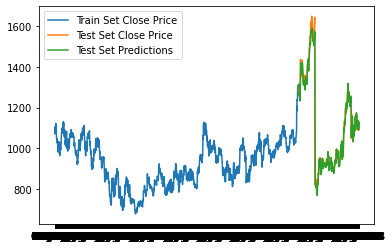

In [7]:
import matplotlib.pyplot as plt
train_set = new_data[:1795]
test_set = new_data[1795:]
test_set['Predictions'] = closing_price
plt.plot(train_set['Close Price'], label='Train Set Close Price')
plt.plot(test_set['Close Price'], label = 'Test Set Close Price')
plt.plot(test_set['Predictions'], label = 'Test Set Predictions')
plt.legend()
plt.show()

In [8]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
stock_price = stock_price.rename(columns={'Close Price': 'Close'})
def SMA(data, period, column='Close'):
    return data[column].rolling(window=period).mean()

## USING MOVING AVERAGE (2 STEP)

In [9]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
stock_price = stock_price.rename(columns={'Close Price': 'Close'})
train_set = stock_price[0:1795]
test_set = stock_price[1795:]
y=test_set.copy()
y['SMA2']=train_set['SMA2']=SMA(stock_price, 2)
rms=sqrt(mean_squared_error(test_set.Close,y.SMA2))
rms

C:\Users\adity\AppData\Local\Temp/ipykernel_12064/720571699.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['SMA2']=train_set['SMA2']=SMA(stock_price, 2)


21.47947317457164

In [10]:
y.head()

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close,Average Price,Total Traded Quantity,SMA2
1795,10-Mar-17,1286.75,1290.25,1296.00,1261.20,1279.10,1281.65,1282.25,5665568,1284.200
1796,14-Mar-17,1281.65,1318.75,1319.00,1285.25,1288.25,1289.50,1299.08,6346620,1285.575
1797,15-Mar-17,1289.50,1291.05,1316.30,1290.40,1302.00,1304.95,1306.90,5510658,1297.225
1798,16-Mar-17,1304.95,1310.00,1310.40,1293.60,1296.80,1297.65,1300.24,3639964,1301.300
1799,17-Mar-17,1297.65,1308.00,1319.95,1298.05,1300.55,1300.70,1302.80,5195076,1299.175


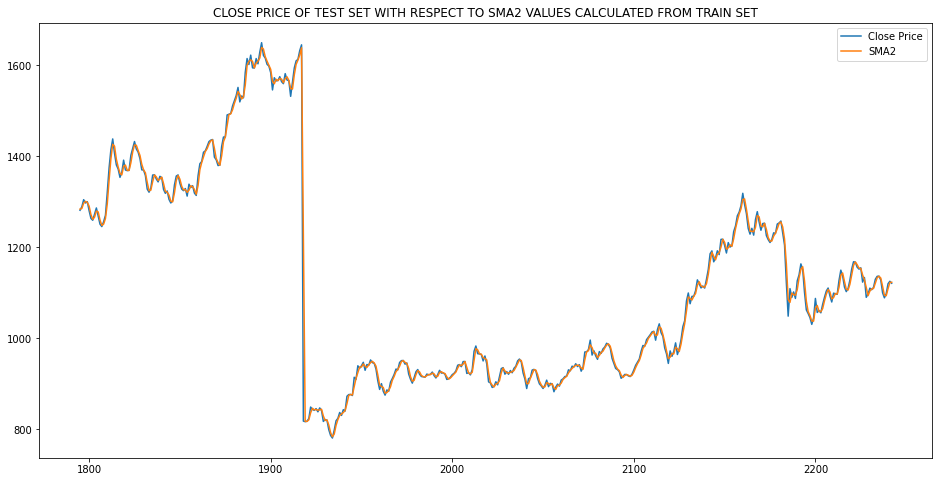

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title("CLOSE PRICE OF TEST SET WITH RESPECT TO SMA2 VALUES CALCULATED FROM TRAIN SET")
plt.plot(y['Close'], label='Close Price')
plt.plot(y['SMA2'], label='SMA2')
plt.legend()
plt.show()